In [34]:
# libraries
import csv
import pandas as pd
import numpy as np
from random import shuffle
import warnings
warnings.filterwarnings('ignore')

## 1. The Dataset: Titanic data

#### The Titanic dataset is a classification dataset: it is used for a prediction task where the goal is to determine whether a person survived the 1912 shipwreck of the RMS Titanic. The list of attributes is as follows:

- output variable: **Survival**, 0 = did not survive, 1 = did survive
- input features:
    - **Pclass**: ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
    - **Sex**: male or female
    - **Age**: quantitative continuous variable
    - **Sibsp**: # of siblings / spouses aboard the Titanic
    - **Parch**: # of parents / children aboard the Titanic	
    - **Ticket**: ticket number
    - **Fare**: passenger fare
    - **Cabin**: cabin number
    - **Embarked**: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [35]:
df = pd.read_csv("Data/titanic_train.csv", na_values=['none'])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.fillna('', inplace=True)
df["Age"] = df["Age"].apply(lambda x: 0 if x == "" else x)
df["Cabin"] = df["Cabin"].apply(lambda x: "Unknown" if x == "" else x)
df["Embarked"] = df["Embarked"].apply(lambda x: "Unknown" if x == "" else x)
df["Pclass"] = df["Pclass"].apply(lambda x: str(x))


train_cols = [df.columns[0]] + list(df.columns[2:])
label = df.columns[1]
X_df = df[train_cols]
y_df = df[label]

X_display = X_df.copy()

#Converting strings to integers and floats for categorical data
categorical_cols = ["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]

for col in categorical_cols:
    X_df[col] = pd.Categorical(X_df[col])
    X_df[col] = X_df[col].cat.codes

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,TotalFamily,Ticket,Fare,Cabin,Embarked
0,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,1,C.A. 24580,10.5000,Unknown,S
1,733,0,2,"Knight, Mr. Robert J",male,30.0,0,0,1,239855,0.0000,Unknown,S
2,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,1,348121,7.6500,F G63,S
3,728,1,3,"Mannion, Miss. Margareth",female,30.0,0,0,1,36866,7.7375,Unknown,Q
4,113,0,3,"Barton, Mr. David John",male,22.0,0,0,1,324669,8.0500,Unknown,S
5,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,6,347088,27.9000,Unknown,S
6,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,30.0,0,0,1,343095,8.0500,Unknown,S
7,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,1,315089,8.6625,Unknown,S
8,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,2,113773,53.1000,D30,S
9,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,1,54636,16.1000,Unknown,S


In [36]:
df = pd.read_csv("Data/titanic_test.csv", na_values=['none'])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.fillna('', inplace=True)
df["Age"] = df["Age"].apply(lambda x: 0 if x == "" else x)
df["Cabin"] = df["Cabin"].apply(lambda x: "Unknown" if x == "" else x)
df["Embarked"] = df["Embarked"].apply(lambda x: "Unknown" if x == "" else x)
df["Pclass"] = df["Pclass"].apply(lambda x: str(x))


train_cols = [df.columns[0]] + list(df.columns[2:])
label = df.columns[1]
test_X_df = df[train_cols]
test_y_df = df[label]

test_X_display = test_X_df.copy()

#Converting strings to integers and floats for categorical data
categorical_cols = ["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]

for col in categorical_cols:
    test_X_df[col] = pd.Categorical(test_X_df[col])
    test_X_df[col] = test_X_df[col].cat.codes
    
dataset = {
        'X': test_X_df,
        'y': test_y_df,
}

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,TotalFamily,Ticket,Fare,Cabin,Embarked
0,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,2,243847,27.0000,Unknown,S
1,763,1,3,"Barah, Mr. Hanna Assi",male,30.0,0,0,1,2663,7.2292,Unknown,C
2,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,1,347464,7.8542,Unknown,S
3,129,1,3,"Peter, Miss. Anna",female,30.0,1,1,3,2668,22.3583,F E69,C
4,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,30.0,1,1,3,F.C.C. 13529,26.2500,Unknown,S
5,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,4,113760,120.0000,B96 B98,S
6,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,1,PC 17590,50.4958,A24,S
7,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,30.0,1,0,2,65303,19.9667,Unknown,S
8,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,3,11752,26.2833,D47,S
9,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,4,113760,120.0000,B96 B98,S


In [37]:
# Use this cell for any data-related exploration

## 2. The Model: LightGBM, with explanation tool SHAP

In [38]:
import shap
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

d_train = lgb.Dataset(X_df, label=y_df)
d_test = lgb.Dataset(test_X_df, label=test_y_df)

# train a lightgbm for the training dataset
model = lgb.train({}, d_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 919
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 12
[LightGBM] [Info] Start training from score 0.383582
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [39]:
#Training accuracy
train_pred = model.predict(X_df).tolist()
train_pred = [0 if x<=0.5 else 1 for x in train_pred]
accuracy_train = round(sum(train_pred == y_df) / len(train_pred), 5)

#Test set accuracy
predictions = model.predict(test_X_df).tolist()
predictions = [0 if x <= 0.5 else 1 for x in predictions]

accuracy_test = round(sum(predictions == test_y_df) / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

indices = [index for index, value in enumerate(zip(predictions, test_y_df.tolist())) if value[0] != value[1]]
shuffle(indices)

The accuracy of the model on the training set is:  0.99851
The accuracy of the model on the test set is:  0.71946


### Global feature importance plot

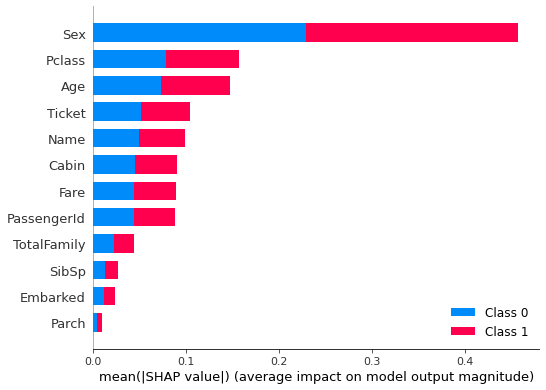

In [40]:
model.params['objective'] = 'binary'
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_df)
shap.summary_plot(shap_values, X_df, plot_type="bar")

### Individual features: partial dependence plots (PDP)


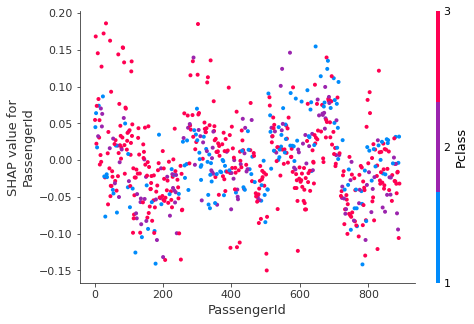

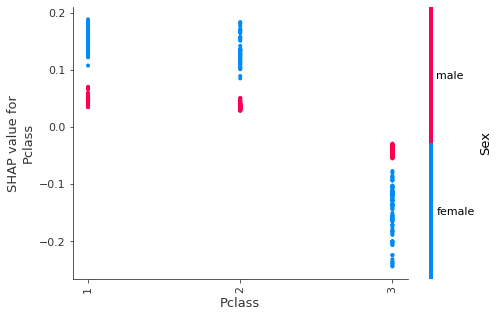

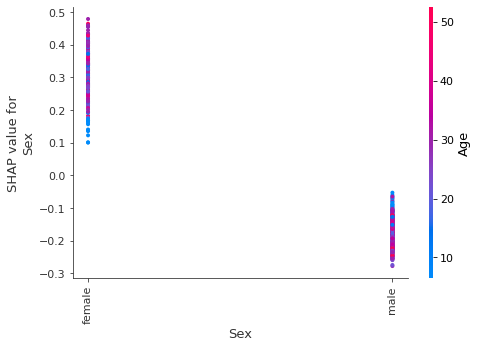

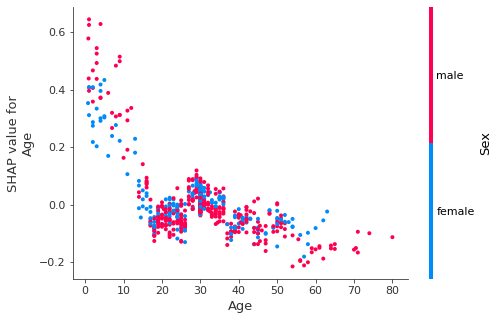

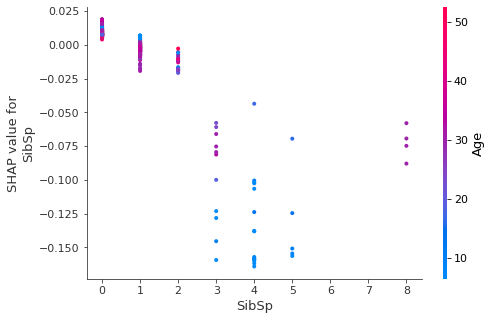

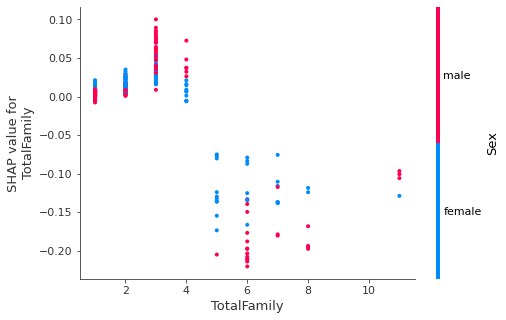

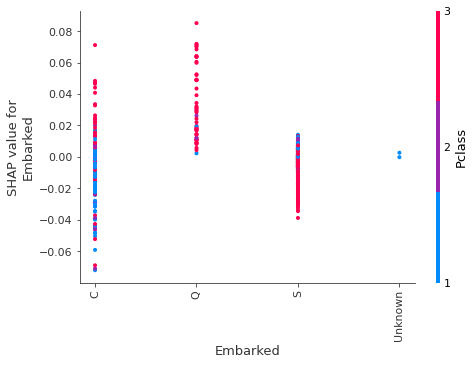

In [41]:
# # Visualizing one feature here
# shap.dependence_plot(X_df.columns[0], shap_values[1], X_df, display_features=X_display)

# # VISUALIZE ALL INPUT FEATURES 

# for name in X_train.columns:
#     shap.dependence_plot(name, shap_values[1], X_df, display_features=X_display)

shap.dependence_plot(X_df.columns[0], shap_values[1], X_df, display_features=X_display)  # PassengerID
shap.dependence_plot(X_df.columns[1], shap_values[1], X_df, display_features=X_display)  # PClass
shap.dependence_plot(X_df.columns[3], shap_values[1], X_df, display_features=X_display)  # Sex
shap.dependence_plot(X_df.columns[4], shap_values[1], X_df, display_features=X_display)  # Age
shap.dependence_plot(X_df.columns[5], shap_values[1], X_df, display_features=X_display)  # SibSp
shap.dependence_plot(X_df.columns[7], shap_values[1], X_df, display_features=X_display)  # TotalFamily
shap.dependence_plot(X_df.columns[11], shap_values[1], X_df, display_features=X_display) # Embarked


### Local explanations

In [42]:
shap_values_test = explainer.shap_values(test_X_df)

def get_display_features(testidx):
    testcase = test_X_df.iloc[testidx, :]

    idx = dataset['X'].index[(dataset['X']['PassengerId'] == testcase['PassengerId']) & (dataset['X']['Pclass'] == testcase['Pclass']) & 
                     (dataset['X']['Name'] == testcase['Name']) & (dataset['X']['Sex'] == testcase['Sex']) &
                    (dataset['X']['Age'] == testcase['Age']) & (dataset['X']['SibSp'] == testcase['SibSp']) & 
                    (dataset['X']['Parch'] == testcase['Parch']) & (dataset['X']['Ticket'] == testcase['Ticket']) & 
                    (dataset['X']['Fare'] == testcase['Fare']) & (dataset['X']['Cabin'] == testcase['Cabin']) &
                    (dataset['X']['Embarked'] == testcase['Embarked'])
                    ]
    return idx

#Enter a test index you want to test
TEST_IDX = 10
idx = get_display_features(TEST_IDX)

In [43]:
shap.force_plot(explainer.expected_value[1], shap_values[1][TEST_IDX,:], X_display.iloc[idx[0],:])